# Ranking of Restaurants

This is my first approach => More the reviews, better the restaurants. This is just an intuition based on the plot of star and review_count that I got during eda analysis. Trying Linear Regression Model first.

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
filtered_df = pd.read_json('data/filtered.json')
filtered_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


Slope: 
 [0.00074853]
Intercept: 
 [3.4493861]
RMSE:  0.8237112452550861


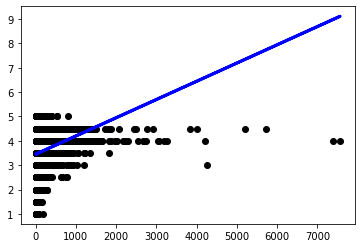

In [29]:
x = filtered_df['stars'].to_list()
y = filtered_df['review_count'].to_list()
ratings = [[i] for i in x]
data = [[i] for i in y]

train_test_split = int(len(ratings) * 0.7)
train_data = data[:train_test_split]
test_data = data[train_test_split:]
train_rating = ratings[:train_test_split]
test_rating = ratings[train_test_split:]

regr = linear_model.LinearRegression()
regr.fit(train_data, train_rating)
slope = regr.coef_[0]
intercept = regr.intercept_

print('Slope: \n', slope)
print('Intercept: \n', intercept)

RMSE = (np.mean((regr.predict(test_data) - test_rating) ** 2)) ** 0.5
print("RMSE: ", RMSE)

plt.scatter(test_data, test_rating, color='black')
plt.plot(test_data, regr.predict(test_data), color='blue', linewidth=3)